In [194]:
# Modules :

from pyforest import *
from tqdm import tqdm
import warnings
from IPython.display import Image
import re
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, roc_curve, auc, log_loss
from tqdm import tqdm
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# import the imputed train and test sets :

train = pd.read_csv(r"D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Train & Test imputed\train.csv")
test = pd.read_csv(r"D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Train & Test imputed\test.csv")

In [3]:
train.isnull().sum()

18-25                   0
26-35                   0
36-45                   0
46-55                   0
56-70                   0
70+                     0
Gap_days_campaign       0
X                       0
Y                       0
category                0
coupon_discount_max     0
coupon_discount_mean    0
coupon_discount_min     0
coupon_discount_sum     0
family_size 1           0
family_size 2           0
family_size 3           0
family_size 4           0
family_size 5+          0
marital_status          0
other_discount_max      0
other_discount_mean     0
other_discount_min      0
other_discount_sum      0
rented                  0
selling_price_max       0
selling_price_mean      0
selling_price_min       0
selling_price_sum       0
no_of_children 1        0
no_of_children 2        0
no_of_children 3        0
income_bracket          0
redemption_status       0
dtype: int64

### About Separately Engineered Features  :

> <font color='blue'>**Gap_days_campaign**</font> : The difference in days bewteen the time campaign started and ended. 

> <font color='blue'>**category**</font> : No of Times a coupon(coupon_id) got applied on all possible categories of items For ex: coupon_id '1' got applied 39 times.

> <font color='blue'>**coupon_discount_max**</font> : Maximum of the discount obtained for that unique customer(customer_id) for all his/her transactions    

> <font color='blue'>**coupon_discount_mean**</font> : Mean of the discount obtained for that unique customer(customer_id) for all his/her transactions

> <font color='blue'>**coupon_discount_min**</font> :  Min of the discount obtained for that unique customer(customer_id) for all his/her transactions

> <font color='blue'>**coupon_discount_sum**</font> :Total of the discount obtained for that unique customer(customer_id) for all his/her transactions

> <font color='blue'>**other_discount_max**</font> : Maximum of the other type of discount obtained for that unique customer(customer_id) for all his/her transactions      

> <font color='blue'>**other_discount_mean**</font> : Mean of the other type of discount obtained for that unique customer(customer_id) for all his/her transactions  

> <font color='blue'>**other_discount_min**</font> : Minimum of the other type of discount obtained for that unique customer(customer_id) for all his/her transactions    

> <font color='blue'>**other_discount_sum**</font> : Total of the other type of discount obtained for that unique customer(customer_id) for all his/her transactions

> <font color='blue'>**selling_price_max**</font> : Maximum of the Selling Price payed by that unique customer(customer_id) for all his/her transactions


> <font color='blue'>**selling_price_mean**</font> : Average of the Selling Price payed by that unique customer(customer_id) for all his/her transactions     

> <font color='blue'>**selling_price_min**</font> : Minumum of the Selling Price payed by that unique customer(customer_id) for all his/her transactions      

> <font color='blue'>**selling_price_sum**</font> : Total of the Selling Price payed by that unique customer(customer_id) for all his/her transactions

## *EXPLORATORY ANALYSIS :*

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 34 columns):
18-25                   78369 non-null int64
26-35                   78369 non-null int64
36-45                   78369 non-null int64
46-55                   78369 non-null int64
56-70                   78369 non-null int64
70+                     78369 non-null int64
Gap_days_campaign       78369 non-null int64
X                       78369 non-null int64
Y                       78369 non-null int64
category                78369 non-null int64
coupon_discount_max     78369 non-null float64
coupon_discount_mean    78369 non-null float64
coupon_discount_min     78369 non-null float64
coupon_discount_sum     78369 non-null float64
family_size 1           78369 non-null int64
family_size 2           78369 non-null int64
family_size 3           78369 non-null int64
family_size 4           78369 non-null int64
family_size 5+          78369 non-null int64
marital_status          7836

### <font color='green'>*Understanding Customer_transactions :*</font>

In [5]:
# Feature Analysis fn(s) :
        

def plot_CumulativeDistribution(feature_1, feature_2, feature_3, feature_4, c1, c2, c3, c4):
    '''
    fn to plot cdf of the feature
    '''
    sns.set()
    sns.set_context(font_scale=2)
    plt.figure(figsize=(20, 15))
    
    plt.subplot(3,4,1)
    freq, value = np.histogram(np.abs(train[feature_1]))
    cum_sum = np.cumsum(freq/sum(freq))
    plt.ylabel('% of the obs')
    plt.xlabel(feature_1)
    plt.plot(np.sort(value[:-1]), cum_sum*100, color=c1, linewidth=4)
    
    plt.subplot(3,4,2)
    freq, value = np.histogram(np.abs(train[feature_2]))
    cum_sum = np.cumsum(freq/sum(freq))
    plt.ylabel('% of the obs')
    plt.xlabel(feature_2)
    plt.plot(np.sort(value[:-1]), cum_sum*100, color=c2, linewidth=4)
    
    plt.subplot(3,4,3)
    freq, value = np.histogram(np.abs(train[feature_3]))
    cum_sum = np.cumsum(freq/sum(freq))
    plt.ylabel('% of the obs')
    plt.xlabel(feature_3)
    plt.plot(np.sort(value[:-1]), cum_sum*100, color=c3, linewidth=4)
    
    plt.subplot(3,4,4)
    freq, value = np.histogram(np.abs(train[feature_4]))
    cum_sum = np.cumsum(freq/sum(freq))
    plt.ylabel('% of the obs')
    plt.xlabel(feature_4)
    plt.plot(np.sort(value[:-1]), cum_sum*100, color=c4, linewidth=4)
    
    plt.tight_layout()

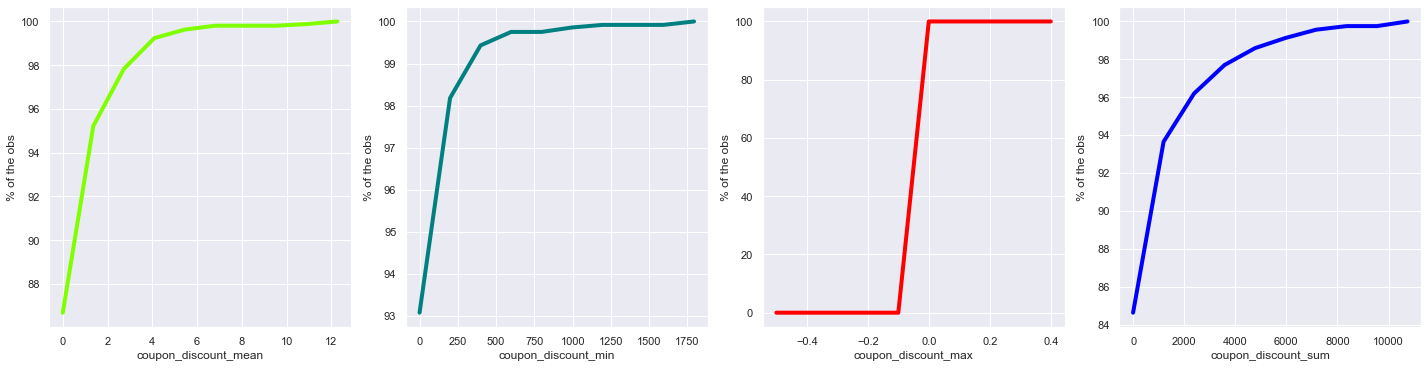

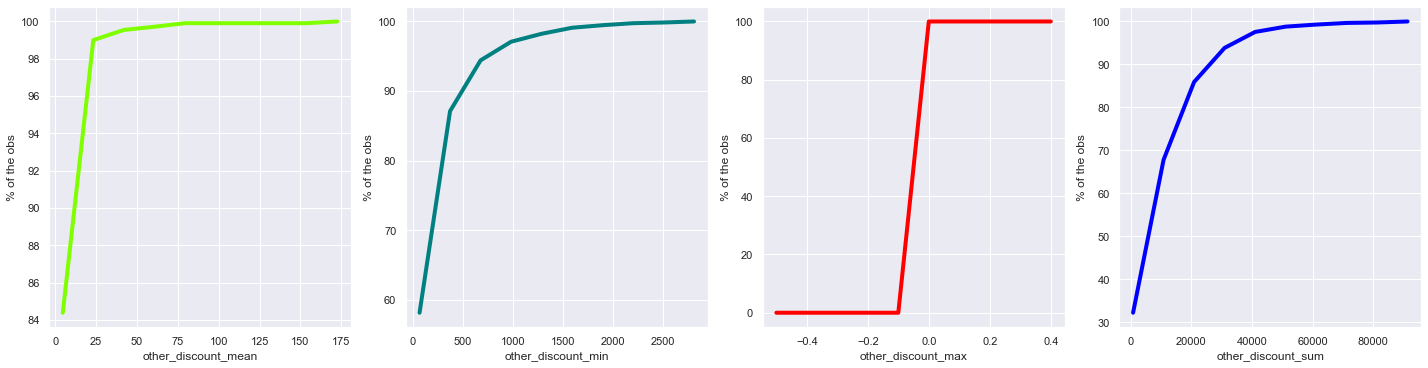

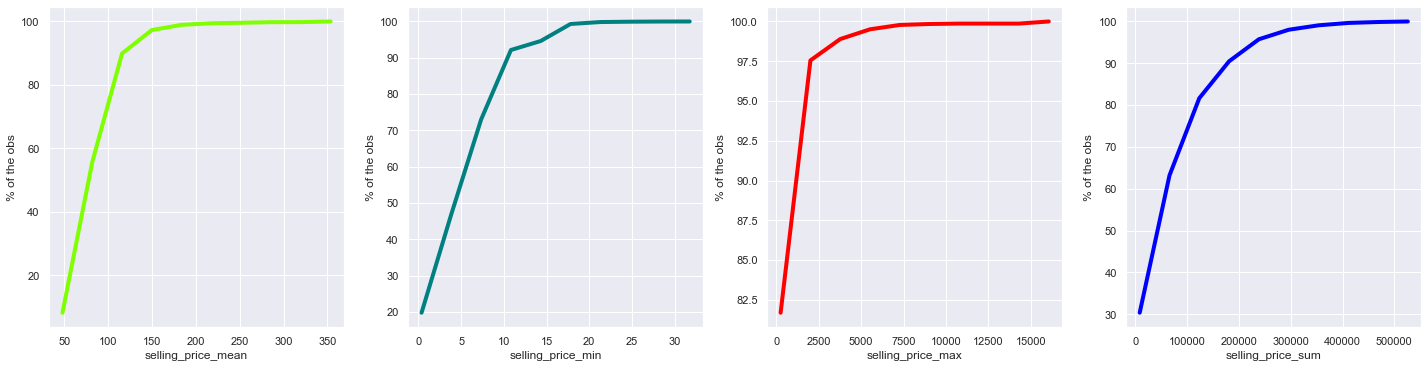

In [6]:
# Cumulative Density Functions of the numerical features :

plot_CumulativeDistribution('coupon_discount_mean', 'coupon_discount_min', 'coupon_discount_max', 'coupon_discount_sum', c1='chartreuse', c2='teal', c3='red', c4='blue' )
plot_CumulativeDistribution('other_discount_mean', 'other_discount_min', 'other_discount_max','other_discount_sum', c1='chartreuse', c2='teal', c3='red',c4='blue')
plot_CumulativeDistribution('selling_price_mean', 'selling_price_min', 'selling_price_max', 'selling_price_sum', c1='chartreuse', c2='teal', c3='red',c4='blue')

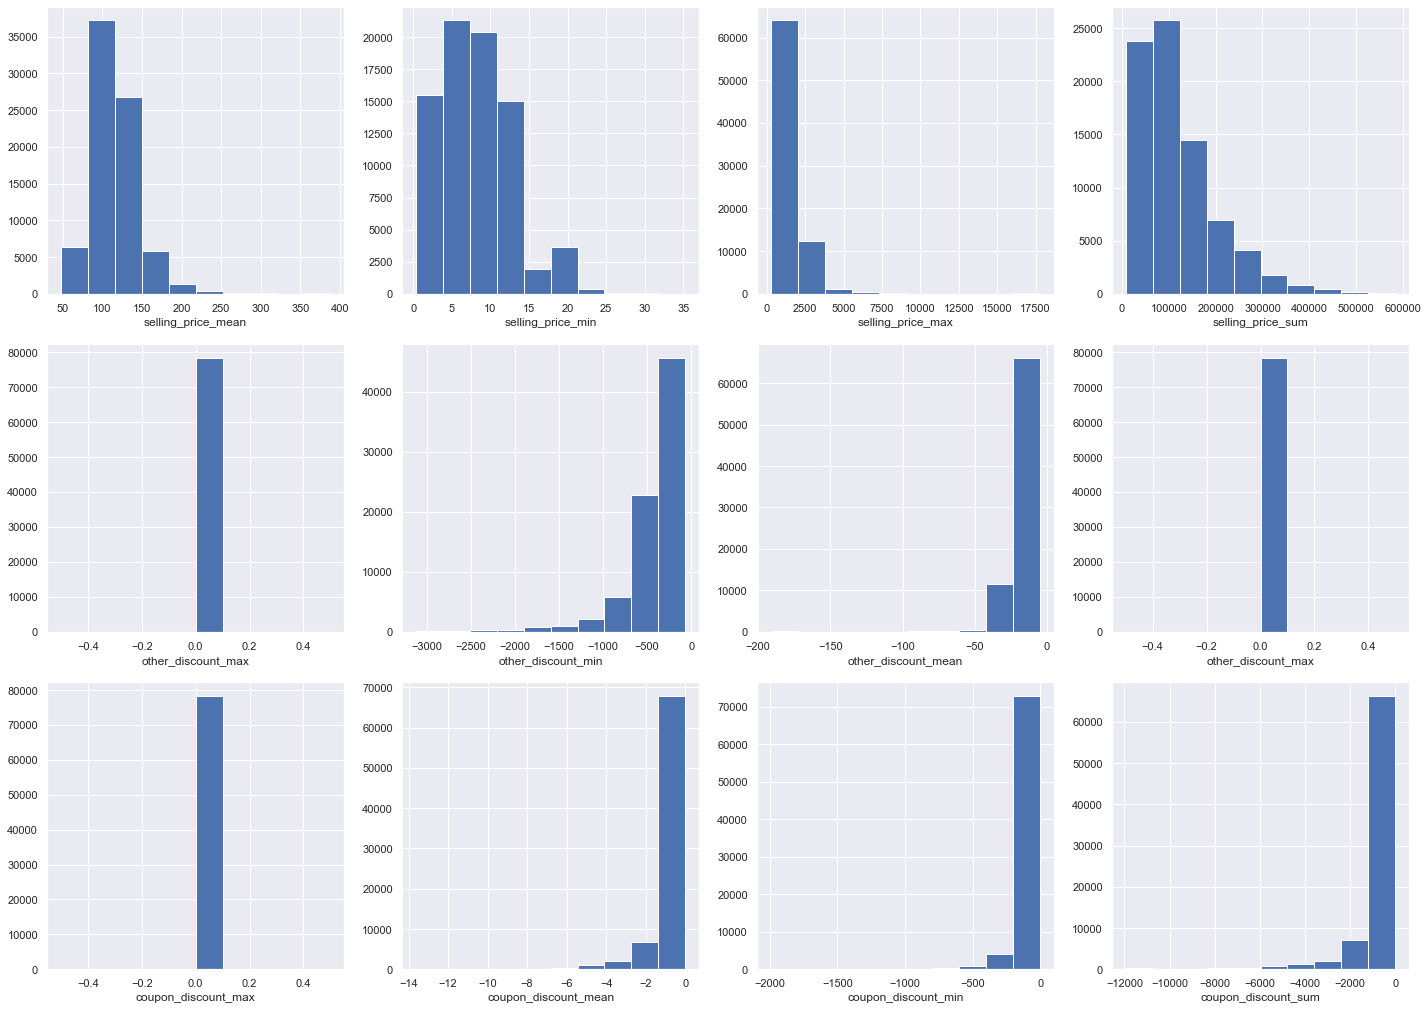

In [7]:
# Histograms for transaction_features :

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,14))

num_feat = ['selling_price_mean',
            'selling_price_min',
            'selling_price_max', 
            'selling_price_sum',
            
           'other_discount_max',
           'other_discount_min',
           'other_discount_mean',
           'other_discount_max',
            
            'coupon_discount_max',
            'coupon_discount_mean',
            'coupon_discount_min',
            'coupon_discount_sum'
           ]

marker_feat = 0


for set_ax in axes:
    plt.tight_layout()
    for each_ax in set_ax:
        each_ax.set_xlabel(num_feat[marker_feat])
        each_ax.hist(train[num_feat[marker_feat]])        
        marker_feat+=1

> *INFERENCE* :

+ For 'other_discount', 96% of the customers had gotten mean 'other_discount' of <= 25 units of money. 


+ For 'other_discount', 80% of the customers had spent average of selling_price of <= 100 units of money. 


+ For 'other_discount', 98% of the customers had gotten average of coupon_discount of <= 3 units of money. 

### <font color='green'>*Understanding 'customer_demographs'  :*</font>

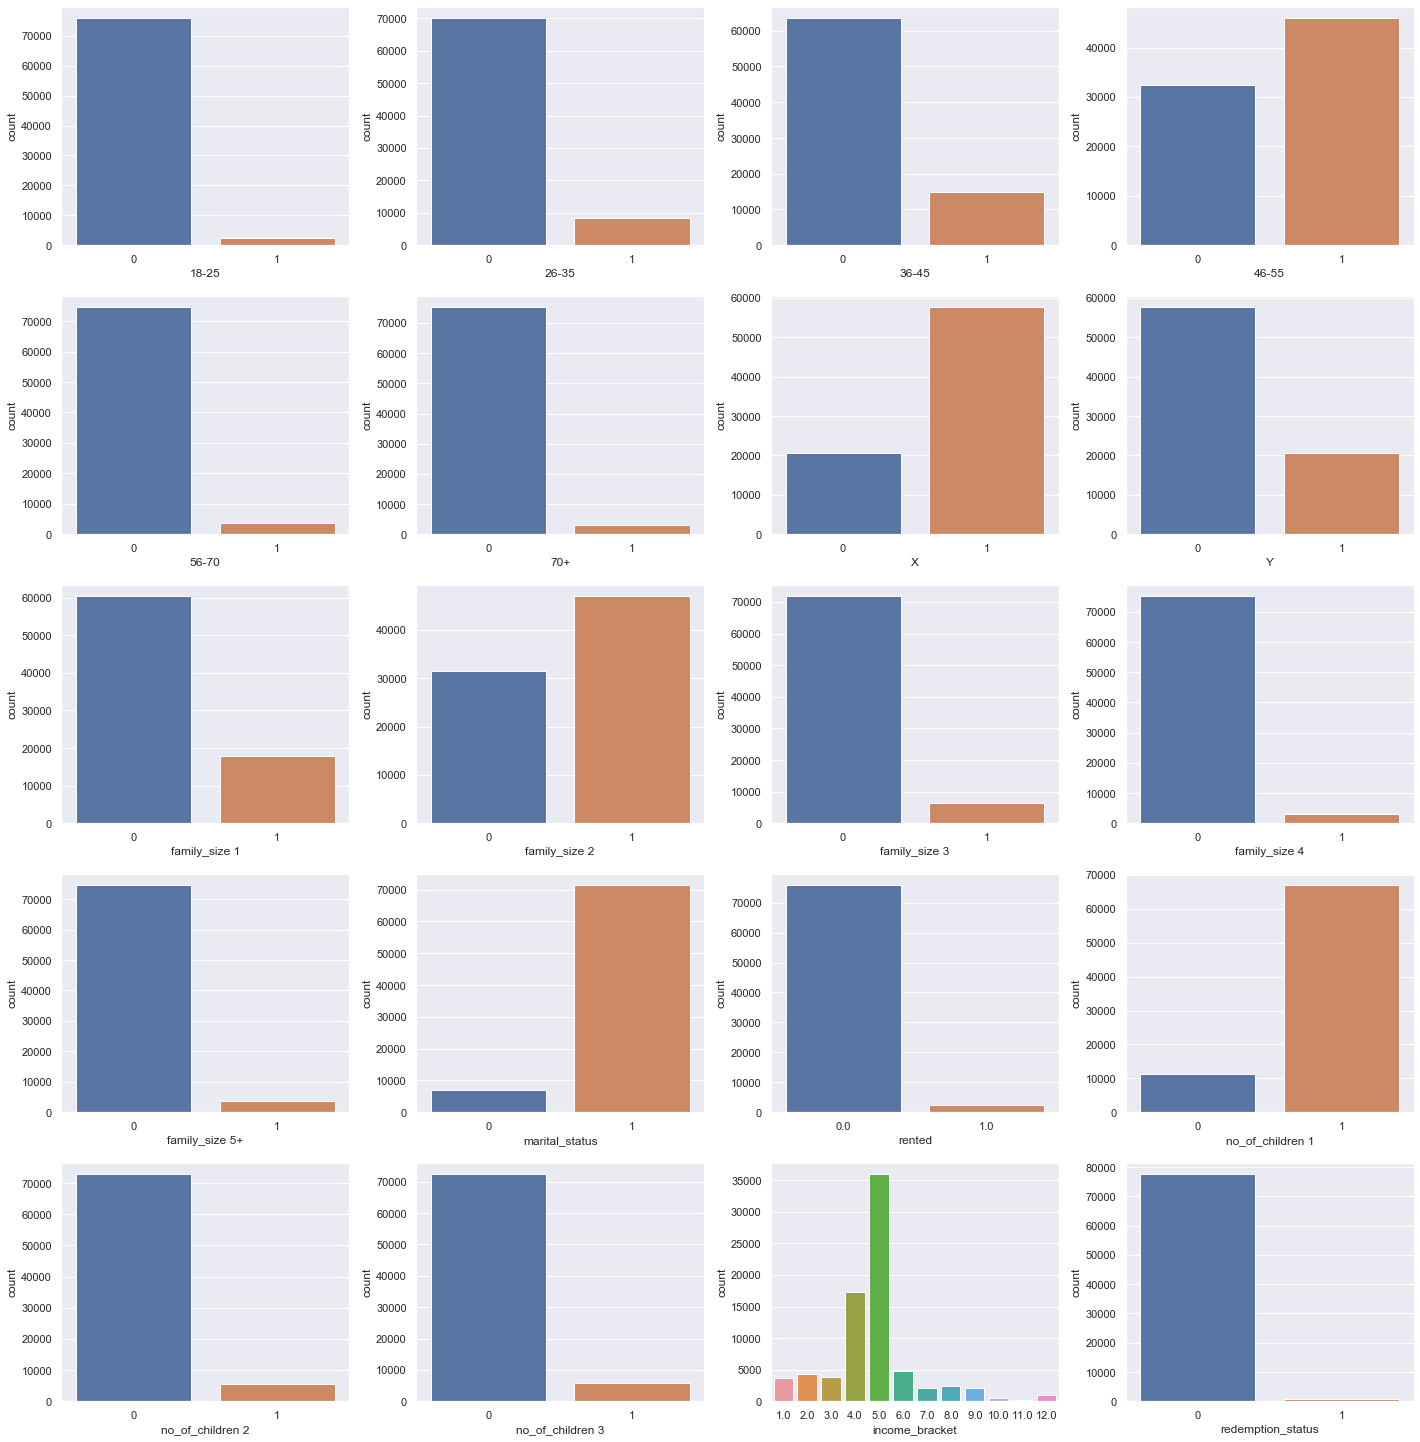

In [8]:
# General Distribution of the categ 

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))

num_feat = ['18-25',
            '26-35',
            '36-45', 
            '46-55',
           '56-70',
           '70+',
           'X',
           'Y',
            'family_size 1',
            'family_size 2',
            'family_size 3',
            'family_size 4',
            'family_size 5+',
            'marital_status', 
            'rented', 
            'no_of_children 1',
            'no_of_children 2',
            'no_of_children 3',
            'income_bracket',
            'redemption_status'
           ]

marker_feat = 0


for set_ax in axes:
    plt.tight_layout()
    for each_ax in set_ax:
        each_ax.set_xlabel(num_feat[marker_feat])
        sns.countplot(train[num_feat[marker_feat]], ax=each_ax)
        marker_feat+=1

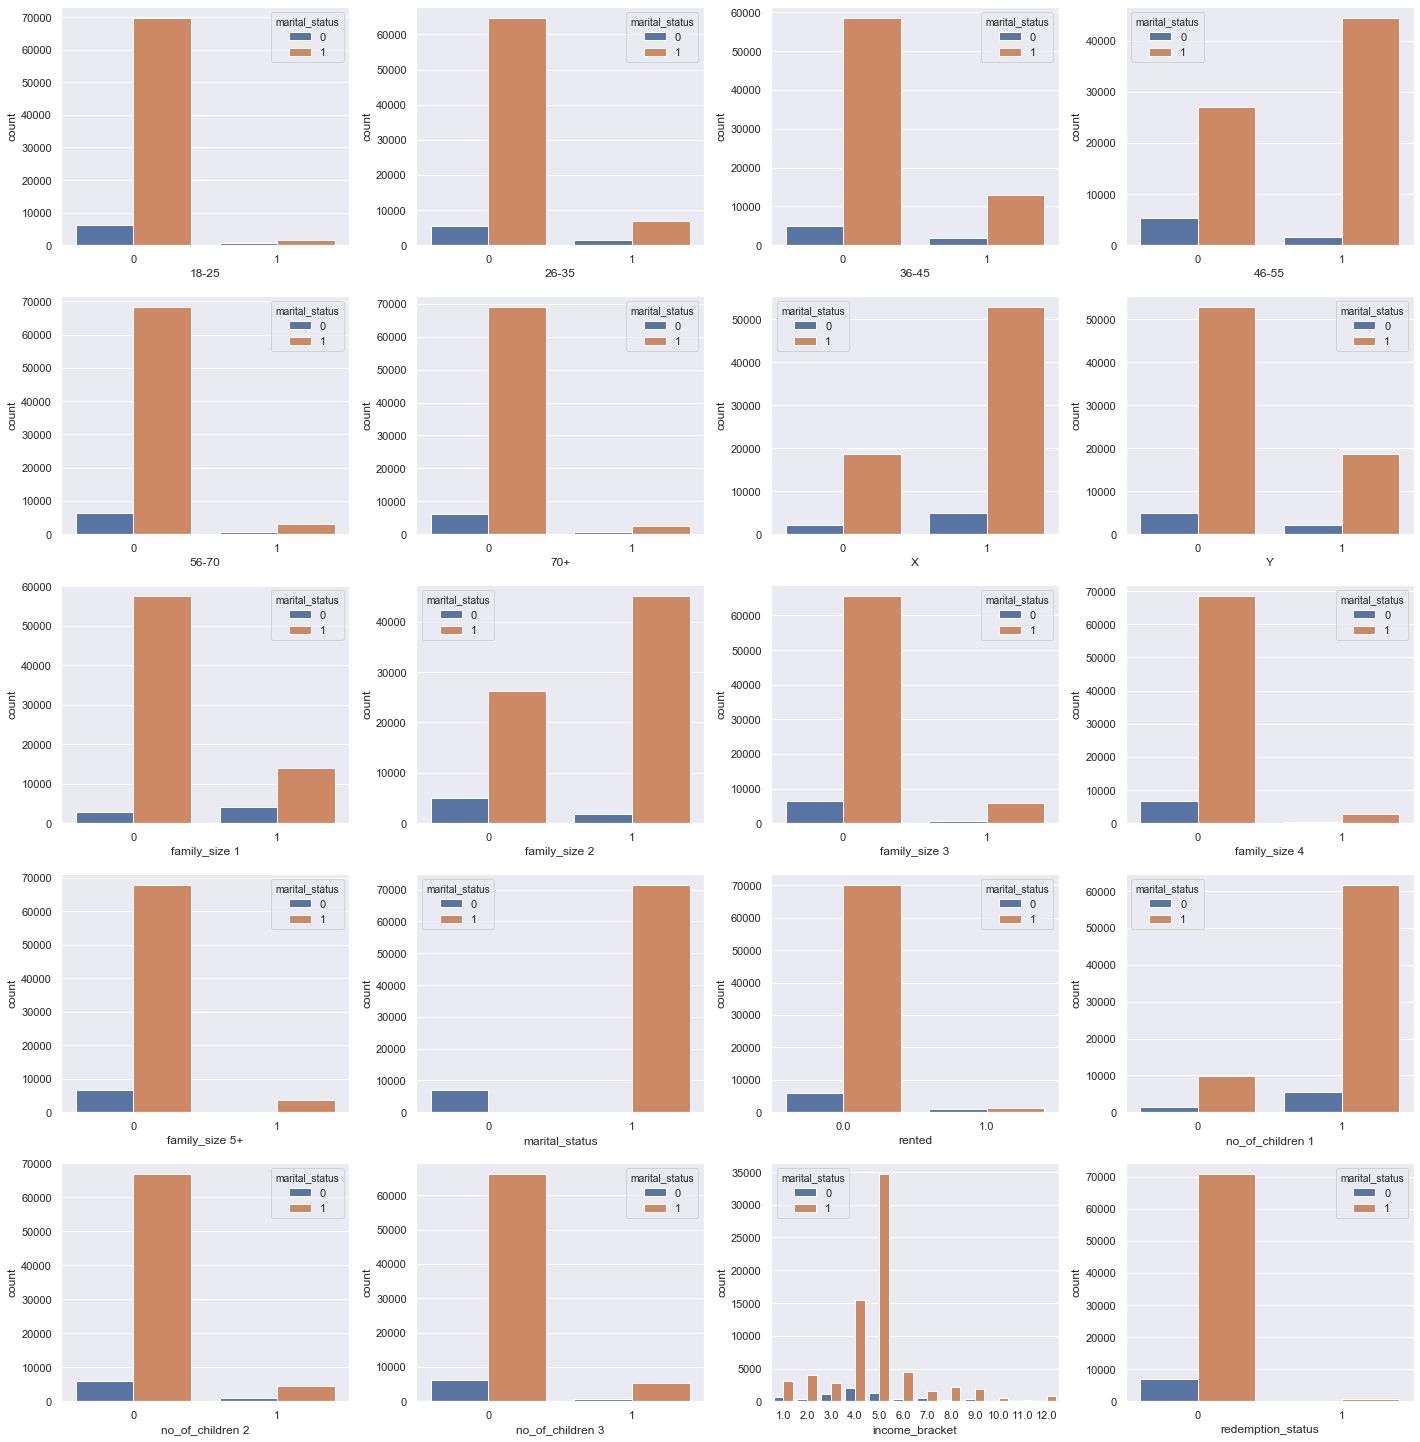

In [9]:
# Analysing the demographs using the 'marital_status' feature :

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))

num_feat = ['18-25',
            '26-35',
            '36-45', 
            '46-55',
           '56-70',
           '70+',
           'X',
           'Y',
            'family_size 1',
            'family_size 2',
            'family_size 3',
            'family_size 4',
            'family_size 5+',
            'marital_status', 
            'rented', 
            'no_of_children 1',
            'no_of_children 2',
            'no_of_children 3',
            'income_bracket',
            'redemption_status'
           ]

marker_feat = 0


for set_ax in axes:
    plt.tight_layout()
    for each_ax in set_ax:
        each_ax.set_xlabel(num_feat[marker_feat])
        sns.countplot(data=train, x=num_feat[marker_feat], hue='marital_status', ax=each_ax)
        marker_feat+=1

> *INFERENCE* :

**Family_size :**
+ As family_size increase from size of 1 to 5+, the containing count of the number of married customers increase as a general trend.

**Age_range :**
+ As the age of the customer increases from certain set of categories, the containing count of the number of married customers increase as a general trend.

**Redemption status :**
+ Those who have redeemed the coupon, contains much high count of the married ones. *However this does not means that if married will redeem the coupon else not otherwise.*

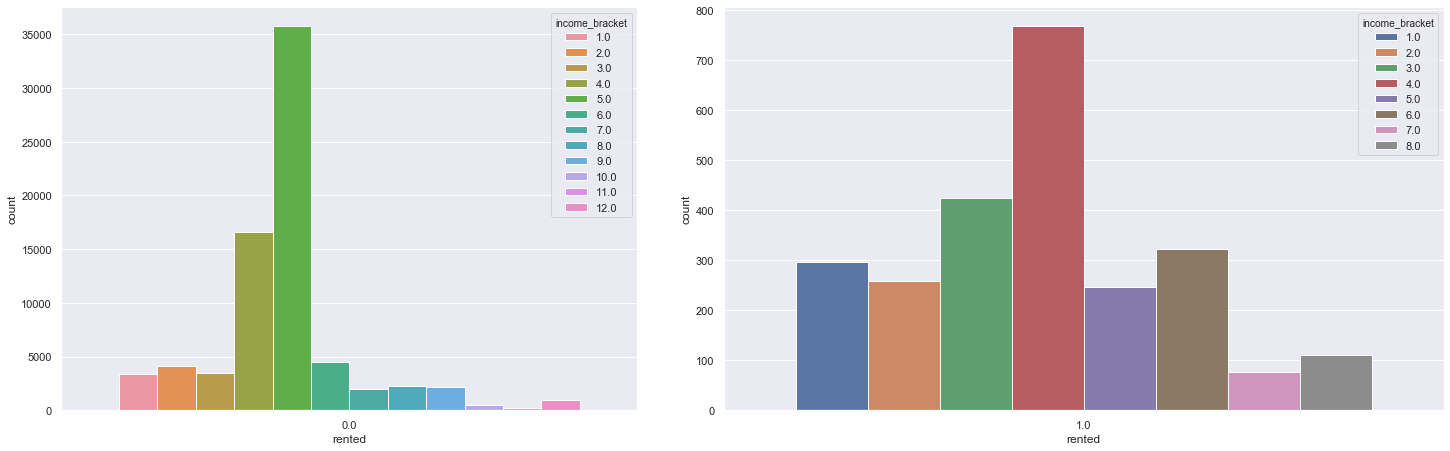

In [10]:
# Searching for any possible relation b/w 'rented' & 'income_bracket' :


fig = plt.figure(figsize=(20, 7))
plt.tight_layout()
# fig.add_axes([0,0,1,1])

axes_1 = fig.add_axes([0.04, 0.06, 0.4, 0.8])
axes_2 = fig.add_axes([0.5, 0.06, 0.5,0.8])

sns.countplot(data=train.ix[train['rented']==0], x='rented', hue='income_bracket', ax=axes_1)
sns.countplot(data=train.ix[train['rented']==1], x='rented', hue='income_bracket', ax=axes_2)

> *INFERENCE* :

**Rented :**
+ Those who didn't rent are majorily middle class income customers with major chunk coming from middle_class_ income bracket of 5 and then income_bracket less than 5.

+ Those who rented displays, income_bracket ranging from 1 to 8 with major chunk of bracket 4 (almost middle class customers).
+ The presence of customers of income_bracket above 8 is not present in the rented(1) type customers which may conclude the fact that those who are living on rent do not belong to the premium income_bracket class groups as they might not have residence of their own.

### <font color='green'>*Infering possibilities using Customer's transactional & demographical features parallely:*</font>

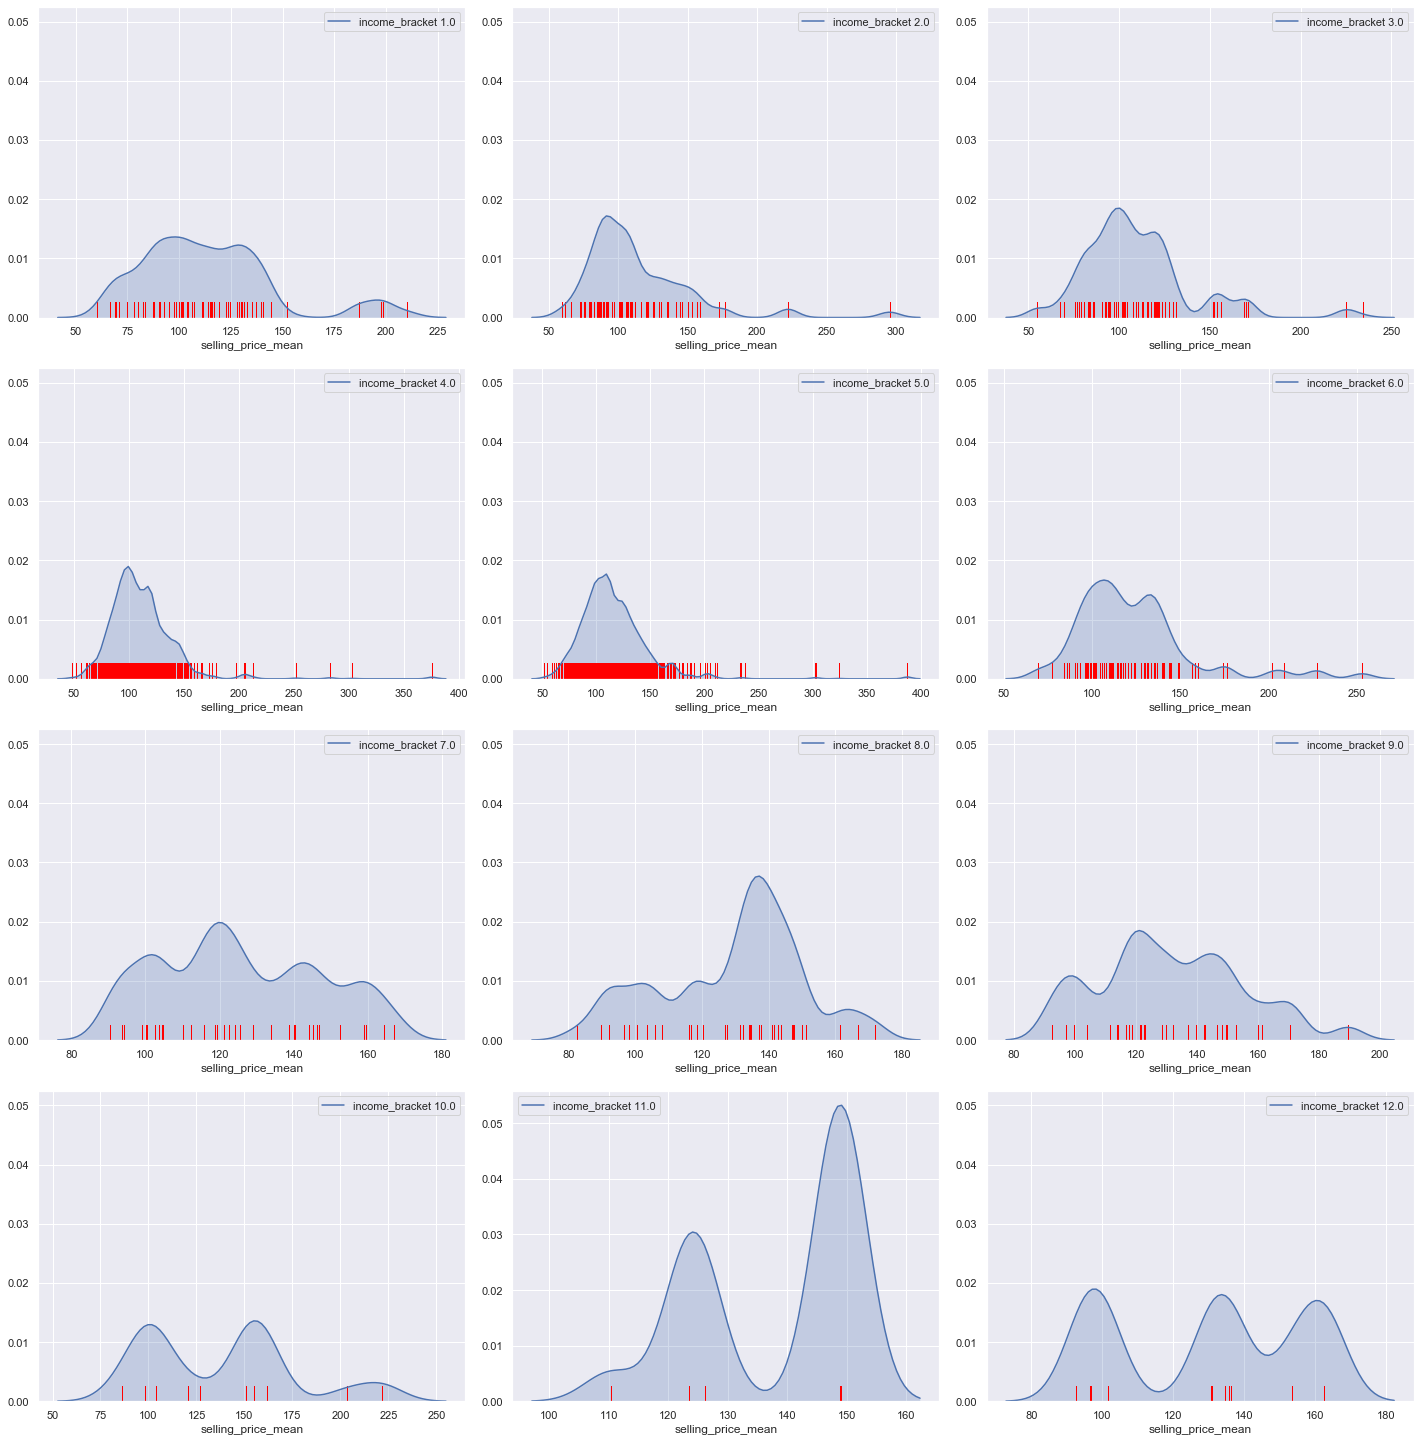

In [11]:
# Selling_price_max (maximum) by each income_bracket :

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

marker_income_bracket = 0

income_brackets = np.sort(train.income_bracket.unique())

sns.set()
for set_ax in axes:
    plt.tight_layout()
    for each_ax in set_ax:
        
        case = train['income_bracket']==income_brackets[marker_income_bracket]
        each_ax.set_xlabel('selling_price_mean')
        
        sns.rugplot(train[case]['selling_price_mean'], color='red', ax=each_ax)
        sns.kdeplot(train[case]['selling_price_mean'],  
                    ax=each_ax, 
                    label="income_bracket "+str(income_brackets[marker_income_bracket]),
                   shade=True)
        
        marker_income_bracket += 1

In [12]:
# # Selling_price_max (maximum) by each income_bracket :

# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

# marker_income_bracket = 0

# income_brackets = np.sort(train.income_bracket.unique())

# sns.set(style='whitegrid')
# for set_ax in axes:
#     plt.tight_layout()
#     for each_ax in set_ax:
        
#         case = train['income_bracket']==income_brackets[marker_income_bracket]
#         each_ax.set_xlabel('selling_price_max')
        
# #         sns.rugplot(train[case]['selling_price_max'], color='black', ax=each_ax)
#         sns.kdeplot(train[case]['selling_price_max'],  
#                     ax=each_ax, 
#                     label="income_bracket "+str(income_brackets[marker_income_bracket]),
#                    shade=True)
        
#         marker_income_bracket += 1

In [13]:
# def plot_3_successive_income_brackets(ib_1, ib_2, ib_3):
#     '''
#     plot distribution of selling_price_mean depending upon the income_bracket segregration
#     '''
    
#     fig = plt.figure(figsize=(20, 7))
    
#     sns.kdeplot(train[train['income_bracket']==ib_1]['selling_price_mean'], label='income_bracket :' + str(ib_1))
#     sns.kdeplot(train[train['income_bracket']==ib_2]['selling_price_mean'],color='red',label='income_bracket :' + str(ib_2))
#     sns.kdeplot(train[train['income_bracket']==ib_3]['selling_price_mean'],color='green',label='income_bracket :' + str(ib_3))


# VISUALIZING KERNEL DENSITY ESTMATES ALL IN ONE PLOT  OF selling_price_mean  per income_bracket :

# fig = plt.figure(figsize=(20, 7))
# axes_1 = fig.add_axes([0,0,1,1])

# for each_income_bracket in np.sort(train.income_bracket.unique()):
#     sns.kdeplot(train[train['income_bracket']==each_income_bracket]['selling_price_mean'], 
#                 ax=axes_1,
#                 label=each_income_bracket,
#                 shade=False)

In [14]:
# # visualizing the selling_price_mean by income_brackets in consective set of 3:
# # Relation analysis of a customers 'income_brackets' with his 'transactional_features' :


# # sns.set('whitegrid')
# # sns.set_context('paper')
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
# plt.tight_layout()


# income_bracket = np.sort(train.income_bracket.unique())
# marker = 0

# for set_ax in axes:
#     plt.tight_layout()
#     for each_ax in set_ax:
#         sns.kdeplot(train[train['income_bracket']==income_bracket[marker+0]]['selling_price_mean'], ax=each_ax, label='income_bracket ' + str(income_bracket[marker+0]),color='red',shade=True)
#         sns.kdeplot(train[train['income_bracket']==income_bracket[marker+1]]['selling_price_mean'], ax=each_ax, label='income_bracket ' + str(income_bracket[marker+1]),color='red',shade=True)
#         sns.kdeplot(train[train['income_bracket']==income_bracket[marker+2]]['selling_price_mean'], ax=each_ax, label='income_bracket ' + str(income_bracket[marker+2]),color='red',shade=True)
#         marker+=3

In [15]:
# different color for curve and different color for shade beneath the curve :

# sns.distplot(x, color='r', kde_kws={"color":'red', 'shade':True}, hist=False, )
# sns.distplot(x, color='b', kde_kws={'shade':False}, hist=False, )

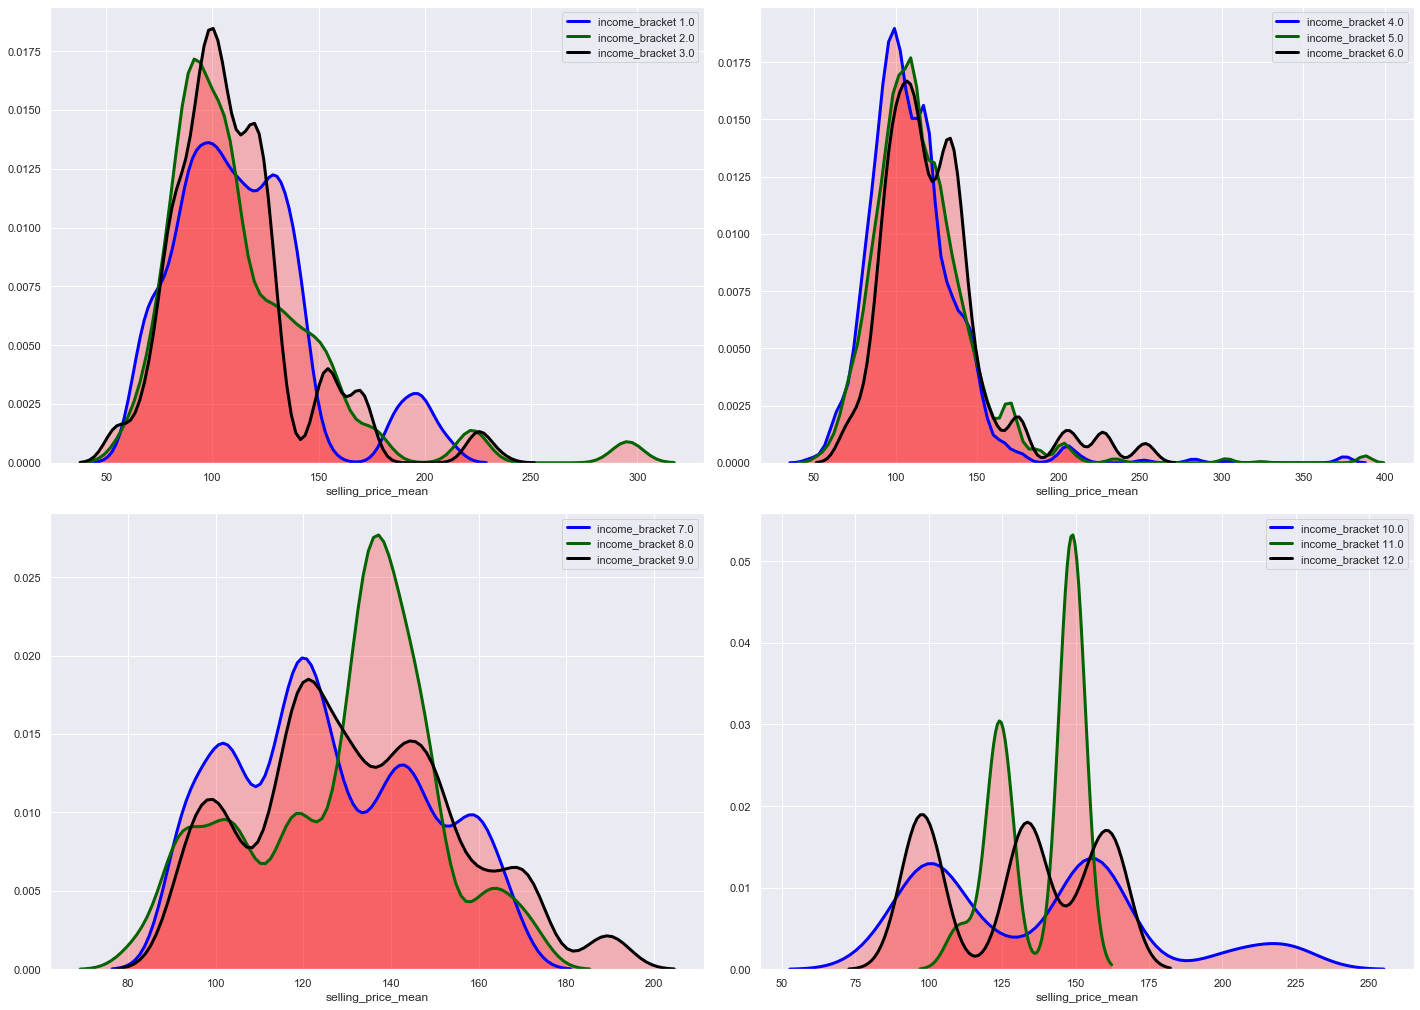

In [16]:
# visualizing the selling_price_mean by income_brackets in consective set of 3:
# Relation analysis of a customers 'income_brackets' with his 'transactional_features' :


# sns.set_context('paper')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
plt.tight_layout()


income_bracket = np.sort(train.income_bracket.unique())
marker = 0

for set_ax in axes:
    plt.tight_layout()
    for each_ax in set_ax:
        
        sns.distplot(train[train['income_bracket']==income_bracket[marker+0]]['selling_price_mean'], 
                     ax=each_ax, 
                     kde_kws={"color":'red', 'shade':True},
                     hist=False)
        
        sns.distplot(train[train['income_bracket']==income_bracket[marker+0]]['selling_price_mean'], 
                     color='blue', 
                     kde_kws={'shade':False, "linewidth":3},
                     label='income_bracket ' + str(income_bracket[marker+0]), 
                     hist=False, 
                     ax=each_ax)
        
        
        sns.distplot(train[train['income_bracket']==income_bracket[marker+1]]['selling_price_mean'], 
                     ax=each_ax, 
                     kde_kws={"color":'red', 'shade':True},
                     hist=False)
        sns.distplot(train[train['income_bracket']==income_bracket[marker+1]]['selling_price_mean'], 
                     color='darkgreen', 
                     kde_kws={'shade':False, "linewidth":3},
                     label='income_bracket ' + str(income_bracket[marker+1]), 
                     hist=False,
                     ax=each_ax)
        
        
        sns.distplot(train[train['income_bracket']==income_bracket[marker+2]]['selling_price_mean'], 
                     ax=each_ax, 
                     kde_kws={"color":'red', 'shade':True},
                     hist=False)
        sns.distplot(train[train['income_bracket']==income_bracket[marker+2]]['selling_price_mean'], 
                     color='black', 
                     kde_kws={'shade':False, "linewidth":3}, 
                     label='income_bracket ' + str(income_bracket[marker+2]),
                     hist=False,
                     ax=each_ax)
        
        marker+=3

> *INFERENCE* :

**Income_bracket :**
+ As income_bracket increases, it implies the fact that the income of the customer also increases
+ *The boundary has been colored separately but the shades have been colored the same to highlight overlapping.*


+ Customers belonging to a certain set of income_brackets tend to show same transactional spending behaviour.
+ For income_bracket 1,2,3 - the underlying distribution of spending overlaps a lot displaying a lot of similarity in expenditure.

+ For income_bracket 4,5,6 - the underlying distribution of spending overlaps a lot displaying a lot of similarity in expenditure.

+ For income_bracket 7,8,9 - the underlying distribution of spending overlaps a lot displaying a lot of similarity in expenditure.

+ For income_bracket 10,11,12 - the underlying distribution of spending shows slightly different unique expenditure pattern.

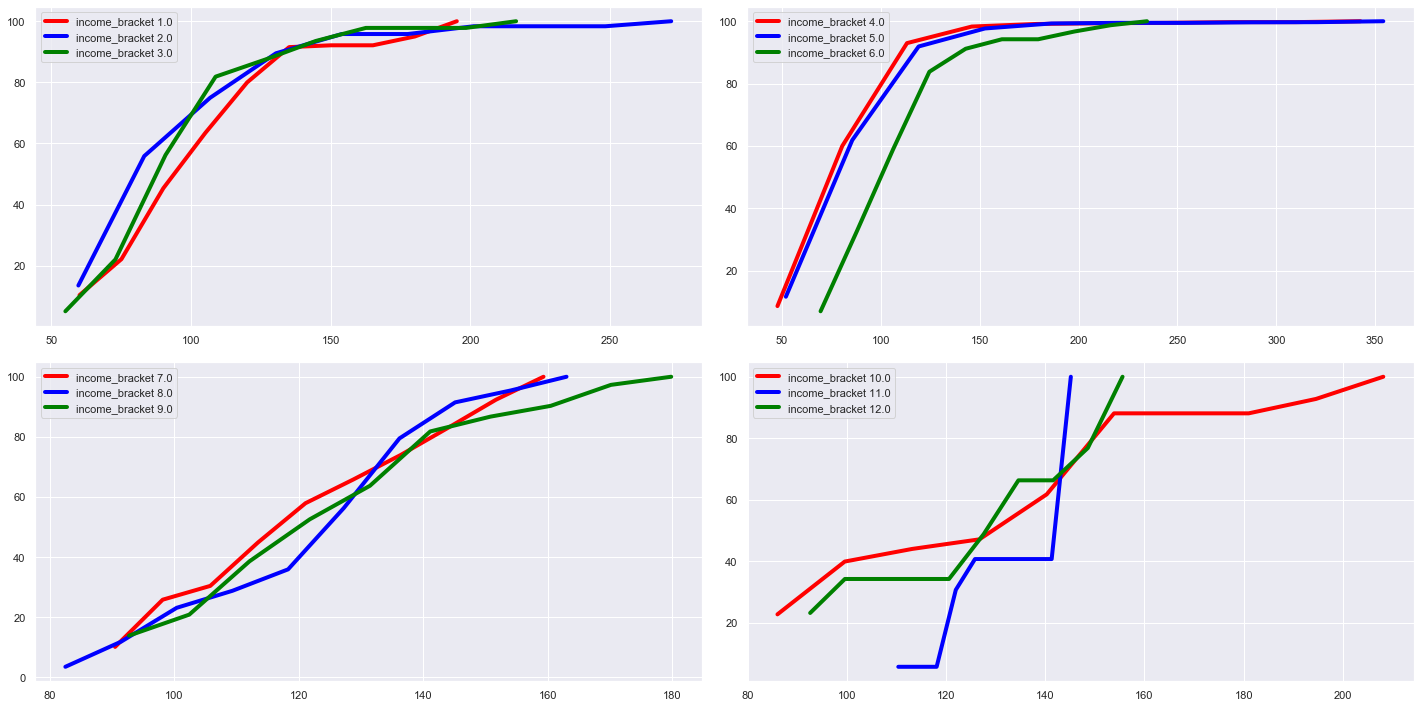

In [17]:
# visualizing the CDF of the 'selling_price_mean' by 'income_brackets' in consective set of 3:
# Relation analysis of a customers 'income_brackets' with his 'transactional_features' :


# sns.set_context('paper')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.tight_layout()


income_bracket = np.sort(train.income_bracket.unique())
marker = 0

for set_ax in axes:
    plt.tight_layout()
    for each_ax in set_ax:
        
        freq, value = np.histogram(train[train['income_bracket']==income_bracket[marker+0]]['selling_price_mean'])
        cum_sum = np.cumsum(freq/sum(freq))
        sns.lineplot(x=np.sort(value[:-1]), 
                     y=cum_sum*100, 
                     color='red', 
                     linewidth=4 ,
                     label='income_bracket ' + str(income_bracket[marker+0]), 
                     ax=each_ax)
        
        freq, value = np.histogram(train[train['income_bracket']==income_bracket[marker+1]]['selling_price_mean'])
        cum_sum = np.cumsum(freq/sum(freq))
        sns.lineplot(x=np.sort(value[:-1]), 
                     y=cum_sum*100, 
                     color='blue', 
                     linewidth=4, 
                     label='income_bracket ' + str(income_bracket[marker+1]), 
                     ax=each_ax)
        
        freq, value = np.histogram(train[train['income_bracket']==income_bracket[marker+2]]['selling_price_mean'])
        cum_sum = np.cumsum(freq/sum(freq))
        sns.lineplot(x=np.sort(value[:-1]), 
                     y=cum_sum*100, 
                     color='green', 
                     linewidth=4, 
                     label='income_bracket ' + str(income_bracket[marker+2]), 
                     ax=each_ax)
        marker+=3


# plt.subplot(3,4,3)
# freq, value = np.histogram(np.abs(train[feature_3]))
# cum_sum = np.cumsum(freq/sum(freq))
# plt.ylabel('% of the obs')
# plt.xlabel(feature_3)
# plt.plot(np.sort(value[:-1]), cum_sum*100, color=c3, linewidth=4)

> *INFERENCE* :

**Income_bracket :**
+ The Cumulative density function also shows the same inference of similar expenditure patterns for the respective group of income_bracketed customers.
+ However the income_brackets of 10,11 & 12 vary slightly though.
+ This confirms the behaviourial inference we had concluded in the previous distributions.

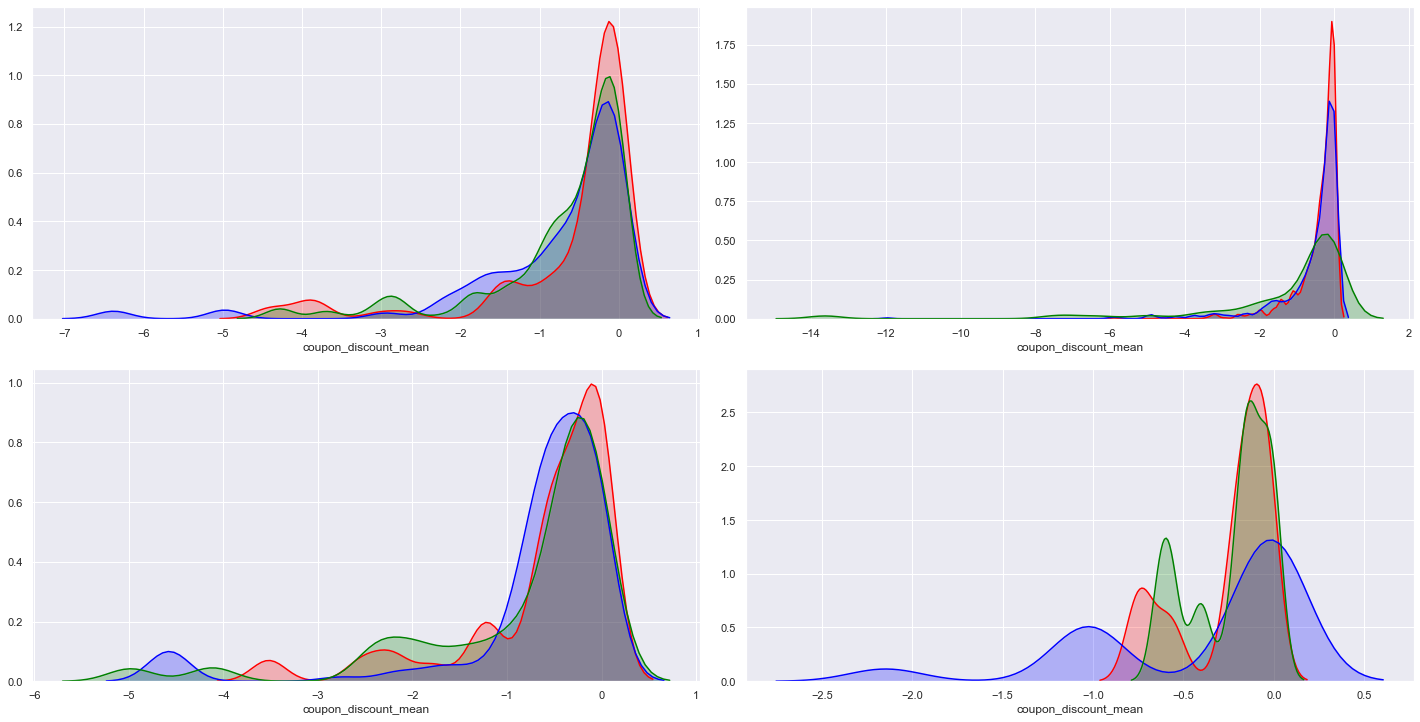

In [18]:
# visualizing the 'coupon_discount_mean' by 'income_brackets' in consective set of 3:
# Relation analysis of a customers 'income_brackets' with his 'transactional_features' :


# sns.set_context('paper')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.tight_layout()


income_bracket = np.sort(train.income_bracket.unique())
marker = 0

for set_ax in axes:
    plt.tight_layout()
    for each_ax in set_ax:
        
        sns.distplot(train[train['income_bracket']==income_bracket[marker+0]]['coupon_discount_mean'], 
                     ax=each_ax, 
                     kde_kws={"color":'red', 'shade':True},
                     hist=False)
        
#         sns.distplot(train[train['income_bracket']==income_bracket[marker+0]]['coupon_discount_mean'], 
#                      color='red', 
#                      kde_kws={'shade':False, "linewidth":5},
#                      label='income_bracket ' + str(income_bracket[marker+0]), 
#                      hist=False, 
#                      ax=each_ax)
        
        
        sns.distplot(train[train['income_bracket']==income_bracket[marker+1]]['coupon_discount_mean'], 
                     ax=each_ax, 
                     kde_kws={"color":'blue', 'shade':True},
                     hist=False)
#         sns.distplot(train[train['income_bracket']==income_bracket[marker+1]]['coupon_discount_mean'], 
#                      color='blue', 
#                      kde_kws={'shade':False, "linewidth":5},
#                      label='income_bracket ' + str(income_bracket[marker+1]), 
#                      hist=False,
#                      ax=each_ax)
        
        
        sns.distplot(train[train['income_bracket']==income_bracket[marker+2]]['coupon_discount_mean'], 
                     ax=each_ax, 
                     kde_kws={"color":'green', 'shade':True},
                     hist=False)
#         sns.distplot(train[train['income_bracket']==income_bracket[marker+2]]['coupon_discount_mean'], 
#                      color='green', 
#                      kde_kws={'shade':False, "linewidth":5}, 
#                      label='income_bracket ' + str(income_bracket[marker+2]),
#                      hist=False,
#                      ax=each_ax)
        
        marker+=3

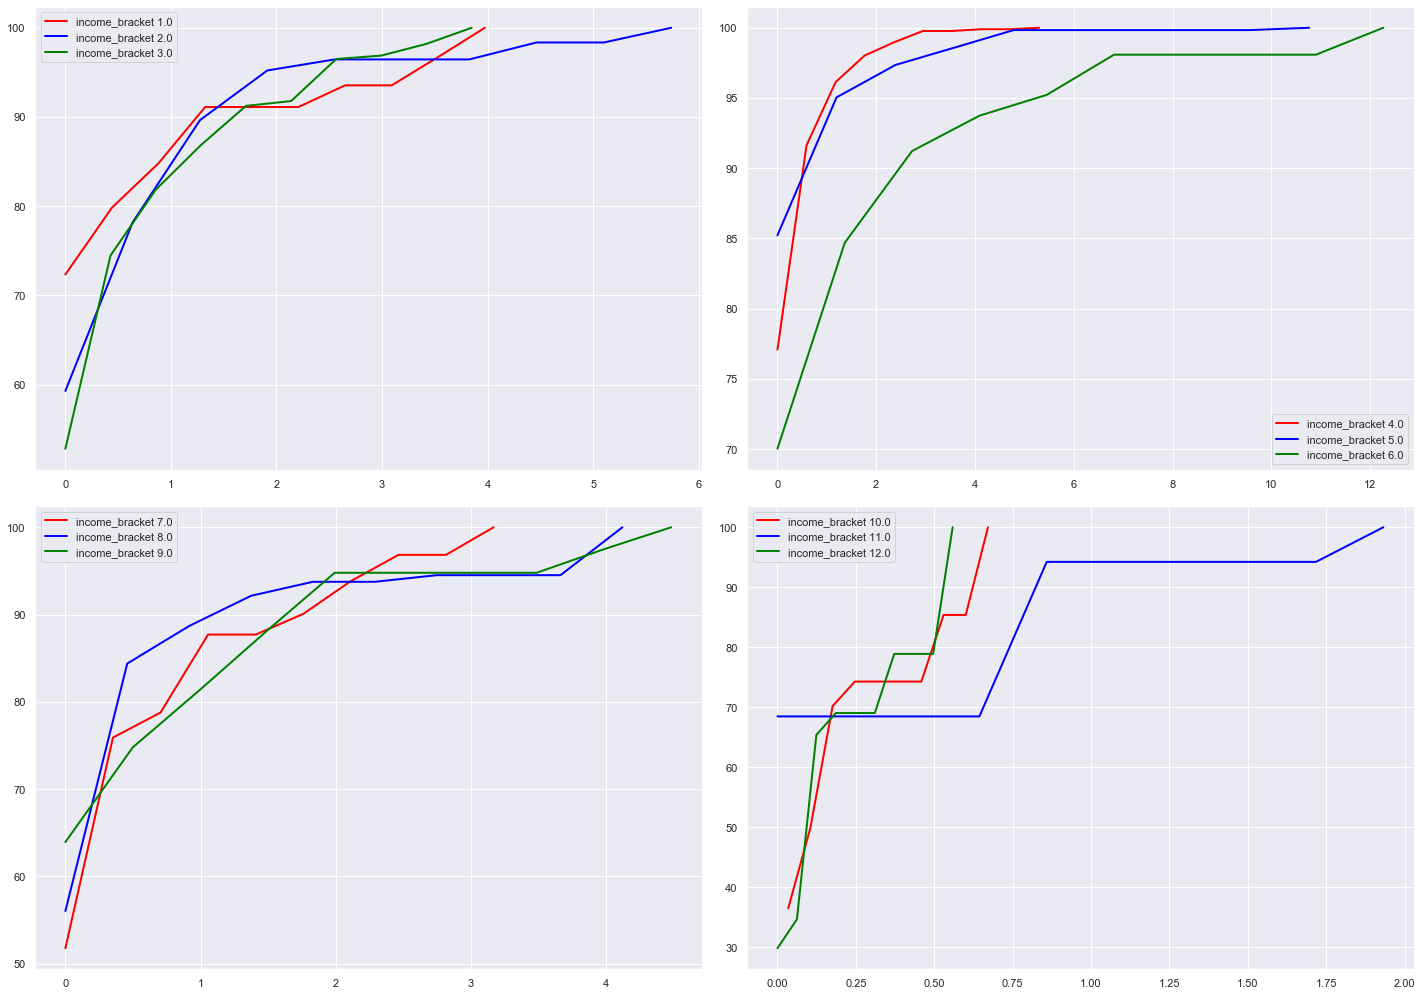

In [19]:
# visualizing the CDF of the 'coupon_discount' by 'income_brackets' in consective set of 3:
# Relation analysis of a customers 'income_brackets' with his 'transactional_features' :


# sns.set_context('paper')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
plt.tight_layout()


income_bracket = np.sort(train.income_bracket.unique())
marker = 0

for set_ax in axes:
    plt.tight_layout()
    for each_ax in set_ax:
        
        freq, value = np.histogram(np.abs(train[train['income_bracket']==income_bracket[marker+0]]['coupon_discount_mean']))
        cum_sum = np.cumsum(freq/sum(freq))
        sns.lineplot(x=np.sort(value[:-1]), 
                     y=cum_sum*100, 
                     color='red', 
                     linewidth=2 ,
                     label='income_bracket ' + str(income_bracket[marker+0]), 
                     ax=each_ax)
        
        freq, value = np.histogram(np.abs(train[train['income_bracket']==income_bracket[marker+1]]['coupon_discount_mean']))
        cum_sum = np.cumsum(freq/sum(freq))
        sns.lineplot(x=np.sort(value[:-1]), 
                     y=cum_sum*100, 
                     color='blue', 
                     linewidth=2, 
                     label='income_bracket ' + str(income_bracket[marker+1]), 
                     ax=each_ax)
        
        freq, value = np.histogram(np.abs(train[train['income_bracket']==income_bracket[marker+2]]['coupon_discount_mean']))
        cum_sum = np.cumsum(freq/sum(freq))
        sns.lineplot(x=np.sort(value[:-1]), 
                     y=cum_sum*100, 
                     color='green', 
                     linewidth=2, 
                     label='income_bracket ' + str(income_bracket[marker+2]), 
                     ax=each_ax)
        marker+=3

> *INFERENCE* :

**Income_bracket :**
+ Income bracket represents an important integral aspect driving the customer's transactional & and to some extent, demographical behaviour.

### <font color='green'>*Understanding Campaigns :*</font>

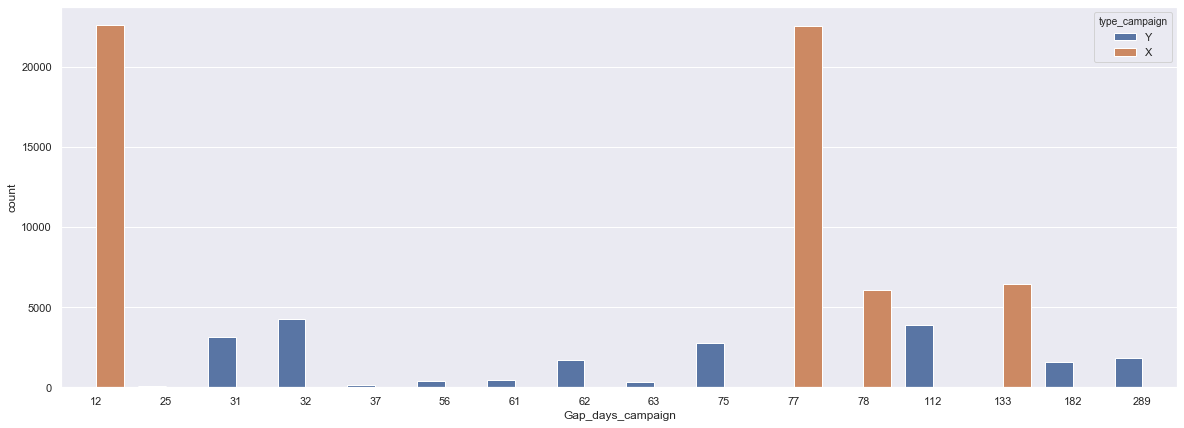

In [20]:
# Features considered :

# Gap_days_campaign
# Types of campaign - X & Y


campaign_viz = pd.DataFrame(train[['Gap_days_campaign', 'X', 'Y']])
campaign_viz['type_campaign'] = campaign_viz['X'].apply(lambda x:'X' if x==1 else 'Y')
del campaign_viz['X']
del campaign_viz['Y']

sns.set()
plt.figure(figsize=(20, 7))
sns.countplot(data=campaign_viz, x='Gap_days_campaign', hue='type_campaign')

> *INFERENCE* :

**Gap_days_campaign & campaign_type :**

+ For campaign type X : the days it took place was either for the lowest(12 days time) OR either above 77 days time.
+ For campaign type Y : the days it took place for, ranged from 30 to 290 but with counts low in comparison to the 'X' type campaign.

> Well, thats not end of exploratort analysis here,  as it majorily depends upon the type of question one can ask and answer it.
Also a multifarious understanding of the underlying domain and data, can explain a lot of logics and reasons behind the same.

## *Modelling :*

**Business Objective  :**
    
+ Developing a classification model for a credit card firm to classify customers depending upon the fact that whether they would redeem a coupon offered in a campaign, on a product

**Constraints :**
    
+ Should be highly interpretable.
+ No latency issues.
+ High Number of datapoints with slight above normal dimensionlaity(33).
+ Cannot use models relying on Eucledian distance metric computation.
+ Exact probability of class belonginig to may be much better if obtained.

*Models to avoid possibly :*

> *KNN*  (eucledian distance based) reason being dimensionlity > ~10(for safe use).Also KNN is not prone to outliers.

> *Naive Bayes*  due to presence of numerical features, we would require much more datapoints to compute conditional probabilities i.e. P(feature=x|y=1/0), so for feature we would require much more datapoints to compute this probability from its pdf.
Since one of our class(=1) is heavily downsampled by default, hence computing this probability P(feature=x|y=1) will not be justified.Positive thing about NB is being prone to outliers via laplace smoothing.

<b>*What to consider before opting for a classification model for our case :*</b>

>+ Interpretability of the model.
>+ Will be good, if imune to outliers.
>+ Can train itself on about ~ 80K datapoints with slightly high dimensionality.
>+ Good train & test time complexity though we don't have any latency issues.

*Candidate Models :*

> **Logistic Regression :**
+ Highly Interpretable as data is linearly separable.
+ Not much impacted by outliers due to sigmoidal tendency for signed distances.
+ Best on train & test time latencey, O(nd) & O(d) respectively.

> **SVM with Soft Margin and Radial basis function based kernel :**
+ Interpretable.
+ Variety of kernels (Linear and non linear modelling).
+ High Train and test time complexities O(n^2) & O(k * d), k being no of support vectors.
+ Not much impacted y outliers for soft margin svm due to tendency of margin maximization concept.

> **Decision Tree model :**
+ Interpretable.
+ Impacted by outliers.
+ Non Linear model.
+ Good on train & test time latency O(nlog(n) * d),d=dimensions & O(tree_depth)
+ Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

> **Ensembling using Bagging OR Boosting OR Voting Ensemble :**
+ More train and test time required (depending upon the no of base learners) but latency not much of concern.
+ Advanced approach of ensembling fundamental models (DT)
+ Can mimimize any type of *loss function* in case of boosting, as for Gradient Boosted Trees.
+ Row & Column bootstrapping for best results.

<b>*Evaluating metric :*</b>

+ Albert Einstein once said, "if you judge a fish on its ability to climb a tree, it will live its whole life believing that it is stupid." This quote really highlights the importance of choosing the right evaluation metric.

+ For a general-purpose metric for classification, we use Area Under ROC Curve (AUROC).

In [21]:
# Defining features :

X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### <font color='red'>*Logistic Regression* :</font>

In [54]:
# Data standardization necessary on Logistic Regression :

X_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
logistic_Regression_Model = LogisticRegression(C=1.0, class_weight='balanced') # applied 'penalty' for imbalanced classes
logistic_Regression_Model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
print(confusion_matrix(y_test, logistic_Regression_Model.predict(X_test_scaled)))

[[18845  4458]
 [   58   150]]


In [57]:
print(classification_report(y_test, logistic_Regression_Model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     23303
           1       0.03      0.72      0.06       208

    accuracy                           0.81     23511
   macro avg       0.51      0.76      0.48     23511
weighted avg       0.99      0.81      0.89     23511



In [58]:
# Accuarcy can't be trusted as this is not the right metric in our case even though after penalizinig the class weights.
# Accuracy on test data :

accuracy_score(y_test, logistic_Regression_Model.predict(X_test_scaled))*100

80.791969716303

In [59]:
# Computing the actual probabilities using calibration classifiers :
from sklearn.calibration import CalibratedClassifierCV

prob_pos_clf_LR = logistic_Regression_Model.predict_proba(X_test_scaled)[:, 1]

clf_isotonic_lr = CalibratedClassifierCV(logistic_Regression_Model, cv=10, method='isotonic')
clf_isotonic_lr.fit(X_train_scaled, y_train)
prob_pos_isotonic_lr = clf_isotonic_lr.predict_proba(X_test_scaled)[:, 1]

Text(0.5, 0, 'False Positive Rate')

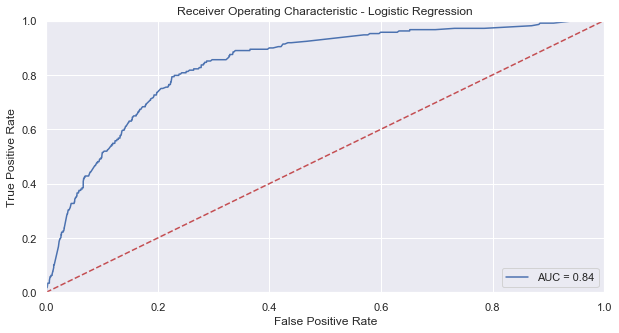

In [60]:
# ROC-AUC curve for untuned logistic regression model:

preds_lr = prob_pos_isotonic_lr
fpr_lr, tpr_lr, threshold = roc_curve(y_test, preds)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


### <font color='red'>*GBDT* :</font>

In [61]:
gbdt_Model = GradientBoostingClassifier() # applied 'penalty' for imbalanced classes
gbdt_Model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
print(confusion_matrix(y_test, gbdt_Model.predict(X_test)))

[[23297     6]
 [  201     7]]


In [63]:
print(classification_report(y_test, gbdt_Model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23303
           1       0.54      0.03      0.06       208

    accuracy                           0.99     23511
   macro avg       0.76      0.52      0.53     23511
weighted avg       0.99      0.99      0.99     23511



In [64]:
# Computing the actual probabilities using calibration classifiers for gbdt model :

prob_pos_clf_LR = gbdt_Model.predict_proba(X_test)[:, 1]

clf_isotonic_gbdt = CalibratedClassifierCV(gbdt_Model, cv=10, method='isotonic')
clf_isotonic_gbdt.fit(X_train, y_train)
prob_pos_isotonic_gbdt = clf_isotonic.predict_proba(X_test)[:, 1]

Text(0.5, 0, 'False Positive Rate')

<Figure size 432x288 with 0 Axes>

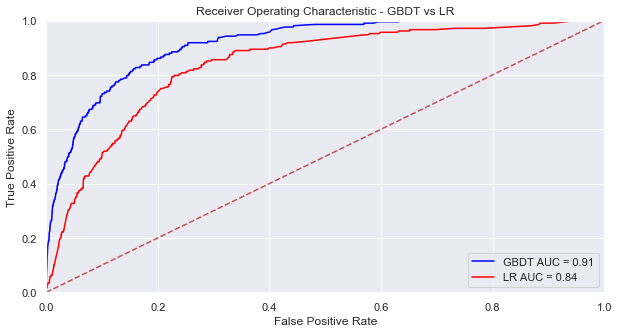

In [65]:
# ROC-AUC curve for untuned logistic regression model VS untuned GBDT:
# first cut model :

sns.set(style='darkgrid')
sns.despine()
preds_gdbt = prob_pos_isotonic_gbdt

fpr_gbdt, tpr_gbdt, threshold = roc_curve(y_test, preds_gdbt)
roc_auc_gbdt = auc(fpr_gbdt, tpr_gbdt)

plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic - GBDT vs LR')

sns.lineplot(fpr_gbdt, tpr_gbdt, color='blue', label = 'GBDT AUC = %0.2f' % roc_auc_gbdt) # GDBT 
sns.lineplot(fpr_lr, tpr_lr, color='red', label = 'LR AUC = %0.2f' % roc_auc_lr) # LR

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [66]:
print("Log Loss - Logistic Regression :" ,log_loss(y_test, preds))
print("Log Loss - GBDT :" ,log_loss(y_test, preds_gdbt))

Log Loss - Logistic Regression : 0.043438310286212596
Log Loss - GBDT : 0.03634681212273826


In [82]:
dict_first_cut_model = {}

dict_first_cut_model['GBDT train log_loss'] = [0.03380989351539393]
dict_first_cut_model['GBDT test log_loss'] = [0.036347039096626614]


print("GBDT Log Loss train  :" , log_loss(y_train, clf_isotonic_gbdt.predict_proba(X_train)[:, 1]))
print("GBDT Log Loss test :" , log_loss(y_test, clf_isotonic_gbdt.predict_proba(X_test)[:, 1]))

GBDT Log Loss train  : 0.03380989351539393
GBDT Log Loss test : 0.036347039096626614


In [79]:
# Cross validating our first cut model :
# scoring parameter = negative of log loss

cross_val = cross_val_score(estimator=gbdt_Model, X=X_train,y=y_train, scoring='neg_log_loss',n_jobs=-1, cv=10)
print('Cross validation score for first cut model : ', cross_val.mean())

# -0.03935 implies that out of all cv iterations, the minimum of log loss i.e maximum of -ve log loss 
# hence log loss = 0.039 for cv set :

Cross validation score for first cut model :  -0.039352676740707866


In [83]:
dict_first_cut_model['GBDT cv log_loss'] = [0.039352676740707866]  # cv set log loss

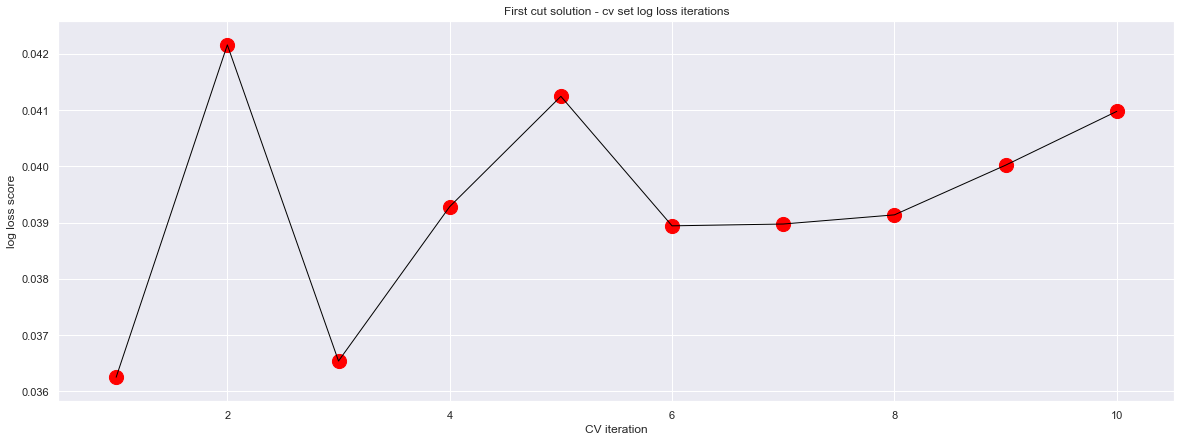

In [123]:
# Debugging the CV set iterations :

plt.figure(figsize=(20, 7))
plt.title('First cut solution - cv set log loss iterations')
plt.ylabel('log loss score')
plt.xlabel('CV iteration')

plt.plot(np.arange(1,11), 
         cross_val*-1, 
         linewidth=1, color='black')

plt.scatter(np.arange(1,11), 
         cross_val*-1, 
         linewidth=1, color='red', marker='o', s=200)

In [138]:
first_cut_gbdt = pd.DataFrame(dict_first_cut_model).transpose()
first_cut_gbdt.reset_index(inplace=True)
first_cut_gbdt.columns = ['Stage', 'Log loss score']

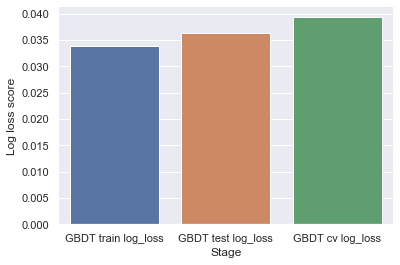

In [157]:
# sns.set('whitegrid', context='notebook')
sns.barplot(data=first_cut_gbdt, x='Stage', y='Log loss score')
sns.despine(top=True)

# optimum performance on train , test & cv sets. (No huge difference between train, test & cv sets)

In [158]:
# Model tuning (GBDT) :

### *Comparing roc_auc scores for TRAIN & CV sets :*

In [162]:
# Scoring parameter is 'ROC AUC SCORES' :

params = {'n_estimators':[100, 120, 140, 160, 180, 200, 220]}

randomizedSearch_gbdt = RandomizedSearchCV(estimator=gbdt_Model, 
                                param_distributions=params, 
                                scoring='roc_auc',
                                n_jobs=-1, 
                                cv=5)

randomizedSearch_gbdt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [172]:
# tuned params score (for best ROC_AUC SCORES) :

tuned_report = pd.DataFrame(randomizedSearch_gbdt.cv_results_)
tuned_report

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,38.086279,0.315423,0.069651,0.007118,100,{'n_estimators': 100},0.911974,0.918389,0.905532,0.900997,0.899049,0.907188,0.007151,7
1,42.687348,3.389592,0.069650,0.007397,120,{'n_estimators': 120},0.913302,0.918532,0.908099,0.903310,0.899669,0.908583,0.006764,6
2,50.145851,4.687801,0.076255,0.013901,140,{'n_estimators': 140},0.912687,0.918897,0.908856,0.904785,0.900009,0.909047,0.006483,5
3,56.104887,2.304992,0.090265,0.010483,160,{'n_estimators': 160},0.912742,0.919443,0.909948,0.905379,0.900942,0.909691,0.006318,4
4,61.915019,1.198571,0.096068,0.009701,180,{'n_estimators': 180},0.912578,0.920854,0.910277,0.907118,0.903365,0.910839,0.005888,3
5,64.069350,0.846334,0.098271,0.007002,200,{'n_estimators': 200},0.911953,0.920237,0.910469,0.907409,0.904898,0.910993,0.005228,2
6,60.682342,8.575495,0.085461,0.026353,220,{'n_estimators': 220},0.912459,0.920140,0.910752,0.907807,0.905003,0.911232,0.005131,1


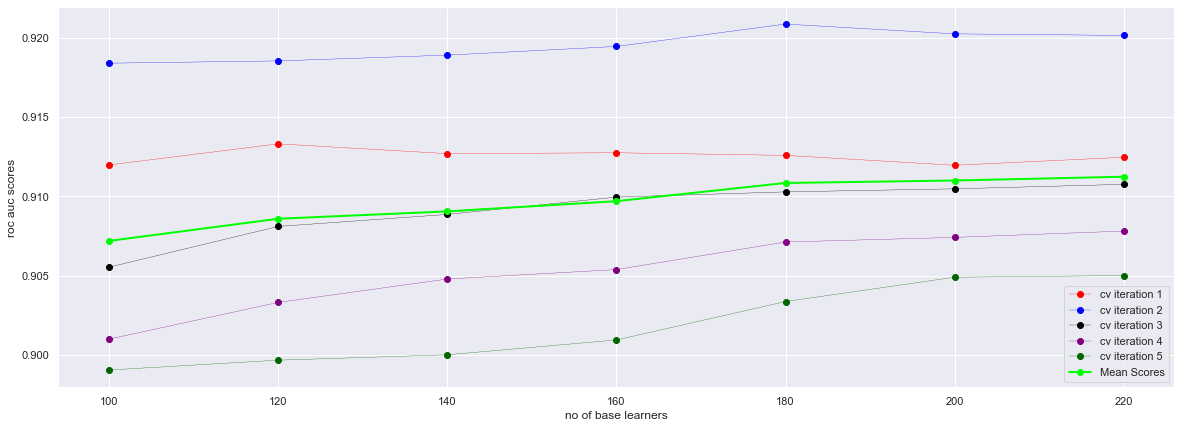

In [197]:
plt.figure(figsize=(20, 7))
plt.plot(params['n_estimators'], tuned_report['split0_test_score'], marker='o',c='red',linewidth=0.3 ,label='cv iteration 1')
plt.plot(params['n_estimators'], tuned_report['split1_test_score'], marker='o',c='blue',linewidth=0.3 ,label='cv iteration 2')
plt.plot(params['n_estimators'], tuned_report['split2_test_score'], marker='o',c='black',linewidth=0.3,label='cv iteration 3')
plt.plot(params['n_estimators'], tuned_report['split3_test_score'], marker='o',c='purple',linewidth=0.3,label='cv iteration 4')
plt.plot(params['n_estimators'], tuned_report['split4_test_score'], marker='o',c='darkgreen',linewidth=0.3, label='cv iteration 5')
plt.plot(params['n_estimators'], tuned_report['mean_test_score'], marker='o', c='lime', linewidth=2,  label='Mean Scores')
plt.xlabel('no of base learners')
plt.ylabel('roc auc scores')
plt.legend()

# no of estimators (best) = 200

In [196]:
# Objective is to note the 'roc_auc' scores at different values of hyperparameter(no of base learners) for the train set
# roc_auc_scores on cv set has already been noted from the above exercise

train_set_roc_auc = []


for each in tqdm(params['n_estimators']):
    
    gbdt = GradientBoostingClassifier(n_estimators=each)
    gbdt.fit(X_train, y_train)
    
    prob_pos_clf = gbdt.predict_proba(X_train)[:, 1]
    clf_isotonic = CalibratedClassifierCV(gbdt, cv=10, method='isotonic')
    clf_isotonic.fit(X_train, y_train)
    prob_pos_isotonic = clf_isotonic.predict_proba(X_train)[:, 1]
    
    preds = prob_pos_isotonic

    fpr, tpr, threshold = roc_curve(y_train, preds)
    train_set_roc_auc.append(auc(fpr, tpr))


100%|██████████████████████████████████████████| 7/7 [29:32<00:00, 253.23s/it]


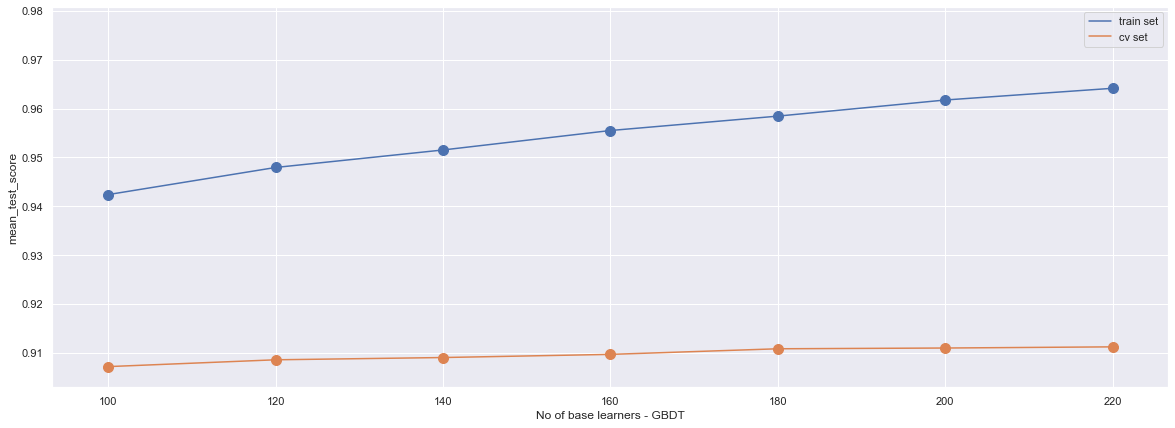

In [224]:
# PERFORMANCE AT SEVERAL VALUES OF HYPER PARAMETER ON TRAIN SET AND CV SET :
# PERFORMANCE METRIC IS ROC-AUC SCORE :

plt.figure(figsize=(20, 7))
# plt.annotate(params['n_estimators'], train_set_roc_auc)
plt.xlabel('No of base learners - GBDT')
plt.scatter(params['n_estimators'], train_set_roc_auc, marker='o', s=100)
plt.scatter(params['n_estimators'], tuned_report['mean_test_score'], marker='o', s=100)
sns.lineplot(params['n_estimators'], train_set_roc_auc, label='train set')
sns.lineplot(params['n_estimators'], tuned_report['mean_test_score'], label='cv set')

+ At no of base learners ~ 100, high scores on train set but low on cv set implying overfitting.

+ At no of base learners ~ 220, high scores on train set & high scores on cv set implying optimal tradeoff b/w bias & variance. 

> At no of base learners=220, we get the best score for train set and cv set thereby implying that the model didn't overfit or underfit, hence optimally performing. 

> We shall now train a proper final model on the train set using the tuned parameter(no of base learners) as 200.

In [215]:
# Objective is to note the roc_auc scores at different values of hyperparameter(no of base learners) for the train set
# roc_auc_scores on cv set has already been noted from the above exercise

train_set_log_loss = []

for each in tqdm(params['n_estimators']):
    
    gbdt = GradientBoostingClassifier(n_estimators=each)
    gbdt.fit(X_train, y_train)
    
    clf_isotonic = CalibratedClassifierCV(gbdt, cv=10, method='isotonic')
    clf_isotonic.fit(X_train, y_train)
    predicted_probabilites_per_class = clf_isotonic.predict_proba(X_train)
    
    train_set_log_loss.append(log_loss(y_train, predicted_probabilites_per_class))


100%|██████████████████████████████████████████| 7/7 [32:43<00:00, 280.50s/it]


In [216]:
# Objective is to note the 'log-loss' scores at different values of hyperparameter(no of base learners) for the train set

params = {'n_estimators':[100, 120, 140, 160, 180, 200, 220]}

randomizedSearch_gbdt_for_log_loss = RandomizedSearchCV(estimator=gbdt_Model, 
                                param_distributions=params, 
                                scoring='neg_log_loss',
                                n_jobs=-1, 
                                cv=5)

randomizedSearch_gbdt_for_log_loss.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [217]:
tuned_report_log_loss = pd.DataFrame(randomizedSearch_gbdt_for_log_loss.cv_results_)
tuned_report_log_loss

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,34.411665,0.318214,0.065447,0.013803,100,{'n_estimators': 100},-0.038553,-0.037964,-0.040121,-0.039765,-0.040611,-0.039403,0.000990,4
1,39.352778,1.828912,0.064646,0.011698,120,{'n_estimators': 120},-0.038165,-0.037898,-0.039769,-0.039569,-0.040486,-0.039178,0.000988,3
2,43.316995,0.188592,0.077855,0.007199,140,{'n_estimators': 140},-0.038236,-0.037708,-0.039643,-0.039500,-0.040286,-0.039074,0.000953,2
3,50.076202,0.358121,0.078657,0.004456,160,{'n_estimators': 160},-0.038168,-0.037643,-0.039525,-0.039493,-0.040138,-0.038993,0.000932,1
4,55.924960,0.325329,0.082059,0.008995,180,{'n_estimators': 180},-0.038225,-0.040537,-0.039293,-0.039469,-0.039926,-0.039490,0.000765,7
5,61.889601,0.368944,0.097869,0.008477,200,{'n_estimators': 200},-0.038204,-0.040552,-0.039419,-0.039500,-0.039719,-0.039479,0.000753,6
6,59.867562,7.618251,0.079857,0.023920,220,{'n_estimators': 220},-0.038183,-0.040437,-0.039356,-0.039585,-0.039731,-0.039459,0.000733,5


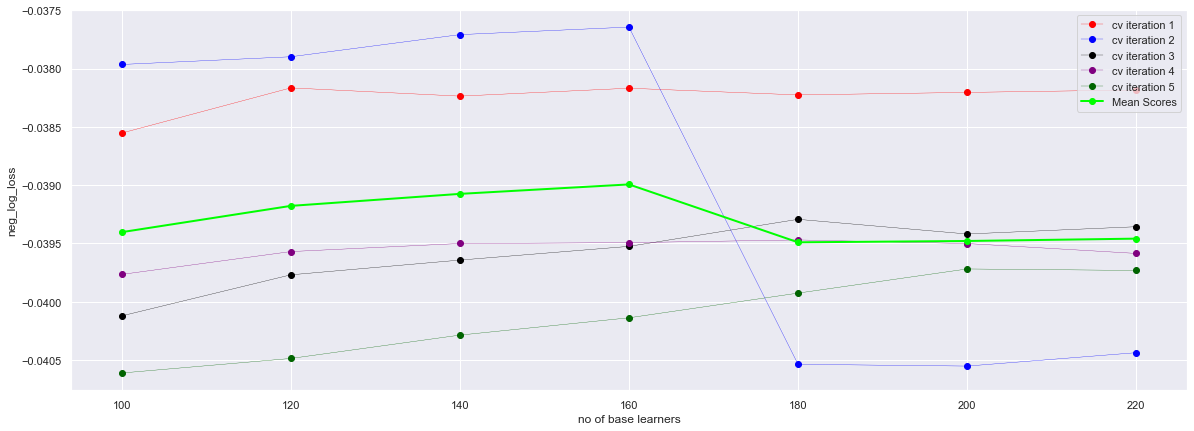

In [220]:
plt.figure(figsize=(20, 7))
plt.plot(params['n_estimators'], tuned_report_log_loss['split0_test_score'], marker='o',c='red',linewidth=0.3 ,label='cv iteration 1')
plt.plot(params['n_estimators'], tuned_report_log_loss['split1_test_score'], marker='o',c='blue',linewidth=0.3 ,label='cv iteration 2')
plt.plot(params['n_estimators'], tuned_report_log_loss['split2_test_score'], marker='o',c='black',linewidth=0.3,label='cv iteration 3')
plt.plot(params['n_estimators'], tuned_report_log_loss['split3_test_score'], marker='o',c='purple',linewidth=0.3,label='cv iteration 4')
plt.plot(params['n_estimators'], tuned_report_log_loss['split4_test_score'], marker='o',c='darkgreen',linewidth=0.3, label='cv iteration 5')
plt.plot(params['n_estimators'], tuned_report_log_loss['mean_test_score'], marker='o', c='lime', linewidth=2,  label='Mean Scores')
plt.xlabel('no of base learners')
plt.ylabel('neg_log_loss')
plt.legend()

# no of estimators (best) = 200

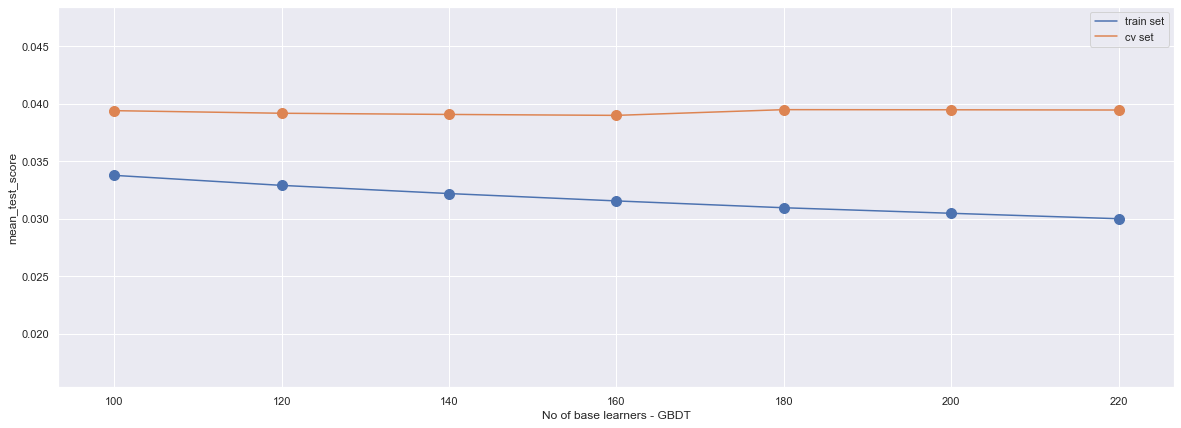

In [221]:
# PERFORMANCE AT SEVERAL VALUES OF HYPER PARAMETER ON TRAIN SET AND CV SET :
# PERFORMANCE METRIC IS ROC-AUC SCORE :

plt.figure(figsize=(20, 7))
# plt.annotate(params['n_estimators'], train_set_roc_auc)
plt.xlabel('No of base learners - GBDT')
plt.scatter(params['n_estimators'], train_set_log_loss, marker='o', s=100)
plt.scatter(params['n_estimators'], np.abs(tuned_report_log_loss['mean_test_score']), marker='o', s=100)
sns.lineplot(params['n_estimators'], train_set_log_loss, label='train set')
sns.lineplot(params['n_estimators'], np.abs(tuned_report_log_loss['mean_test_score']), label='cv set')

<b>*From log loss perspective :*</b>

+ At no of base learners=220, we observe a very low train loss but at the sampe point, high cv set loss, which implies overfitting.

+ At no of base learners=160, we observe low log loss for train and cv set as well, thereby implying bias_variance tradeoff point to be optimal.

+ At no of base learners to be 100 we observe a high train and cv set loss,implying underfitting. 

<b>*Final Inference :*</b>

+ From log loss mimization perspective, opt for no of base learners to be around ~ 150

+ From roc_auc score maximization , opt for no of base learners to be around ~ 200,